####  ADMN5016 Assignment 
####  Proof of Concept for Machine Learning Application  


####  Business Analytics, St Lawrence College - Kingston  

####  Saranya Rajasekhar Nair 
####  Elvis  Ramirez - Student ID: 4354150                    

## I. About the Problem Statement ✔️

This study aims to provide precise insights into the current salary trajectories within the data science realm by examining the complex interconnections among various factors. and we leverage the dataset, containing information such as work years, experience level, employment type, job title, salary details, employee residence, remote work ratio, company location, and company size, to create a machine learning model. Based on the provided data profiles, this model will be specifically developed to accurately predict salaries for different job positions. 

Furthermore, the implementation of this machine learning model can significantly improve a company's process. By utilizing the predictions generated by the model, the company can enhance its salary structuring and decision-making processes. The model can assist in determining competitive compensation packages, optimizing resource allocation, and aligning salaries with industry standards.

## II. Domain Knowledge ✔️ 

#### work_year [categorical] : 
This represents the specific year in which the salary was disbursed. Different years may have different economic conditions which can impact the salary level.

#### experience_level [categorical] : 
The level of experience a person holds in a particular job. This is a key determinant in salary calculation as typically, more experienced individuals receive higher pay due to their advanced skills and knowledge.

#### employment_type [categorical] : 
The nature of the employment contract such as full-time, part-time, or contractual can greatly influence the salary. Full-time employees often have higher annual salaries compared to their part-time or contractual counterparts.

####  job_title [categorical] : 
The role an individual holds within a company. Different roles have different salary scales based on the responsibilities and skills required. For example, managerial roles typically pay more than entry-level positions.

#### salary [numerical] : 
The total gross salary paid to the individual. This is directly influenced by factors such as experience level, job title, and employment type.

#### salary_currency [categorical] : 
The specific currency in which the salary is paid, denoted by an ISO 4217 code. Exchange rates could affect the value of the salary when converted into different currencies.

#### salaryinusd [numerical] : 
The total gross salary amount converted to US dollars. This allows for a uniform comparison of salaries across different countries and currencies.

#### employee_residence [categorical]: 
The primary country of residence of the employee, denoted by an ISO 3166 code. The cost of living and prevailing wage rates in the employee's country of residence can impact salary levels.

#### remote_ratio [ratio]: 
The proportion of work done remotely. With the rise of remote work, companies may adjust salaries based on the cost of living in the employee's location and the proportion of remote work.

#### company_location [categorical]: 
The location of the employer's main office or the branch that holds the contract. Companies in different locations may offer different salary scales due to varying economic conditions and cost of living.

#### company_size [categorical]: 
The median number of employees in the company during the work year. Larger companies often have structured salary scales and may offer higher salaries due to economies of scale and larger revenue streams.

✔️ These variables, in combination with appropriate statistical and machine learning techniques, can help predict an individual's salary.

# III. Import Dataset, and the required libraries ✔️ 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Statistics libraries
from scipy import stats
from scipy.stats import norm

# Import Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

# Import country code libraries
!pip install pycountry -q
import pycountry

#Install plot library
import plotly.io as pio

## IV. Input Data ✔️ 

In [3]:
mySalariesDF = pd.read_csv('C:/datasets2/ds_salaries.csv')

In [4]:
mySalariesDF.shape

(3755, 11)

In [5]:
mySalariesDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## 1.0 EXPLORATORY DATA ANALYSIS ✔️ 

## 1.1 | Data Quality

### Check null and Missing Values

In [7]:
#check missing ratio
data_na = (mySalariesDF.isnull().sum() / len(mySalariesDF)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio


### Check Duplicates

In [8]:
# Handle duplicates
duplicate_rows_data = mySalariesDF[mySalariesDF.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1171, 11)


### Check Unique Value in each columns 

In [9]:
for column in mySalariesDF.columns:
    num_distinct_values = len(mySalariesDF[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

work_year: 4 distinct values
experience_level: 4 distinct values
employment_type: 4 distinct values
job_title: 93 distinct values
salary: 815 distinct values
salary_currency: 20 distinct values
salary_in_usd: 1035 distinct values
employee_residence: 78 distinct values
remote_ratio: 3 distinct values
company_location: 72 distinct values
company_size: 3 distinct values


### Explore the data

In [10]:
mySalariesDF.shape

(3755, 11)

In [11]:
mySalariesDF.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [12]:
mySalariesDF.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [13]:
# Descriptive stats
print(mySalariesDF.describe())

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


## 2.0 FEATURES ENGINEERING ✔️ 

### Rename the value for better understanding

In [16]:
mySalariesDF['experience_level'] = mySalariesDF['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

mySalariesDF['employment_type'] = mySalariesDF['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
mySalariesDF['company_size'] = mySalariesDF['company_size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L' : 'Large',
})
mySalariesDF['remote_ratio'] = mySalariesDF['remote_ratio'].astype(str)
mySalariesDF['remote_ratio'] = mySalariesDF['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

### Group the job title

In [18]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
mySalariesDF['job_category'] = mySalariesDF['job_title'].apply(assign_broader_category)

In [19]:
mySalariesDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,LARGE,Other
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL,Machine Learning
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,MEDIUM,Data Science
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,MEDIUM,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,LARGE,Data Science
3751,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,LARGE,Other
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,SMALL,Data Science
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,LARGE,Data Engineering


# 3.0 Univariative Analysis ✔️ 

### Job Distribution

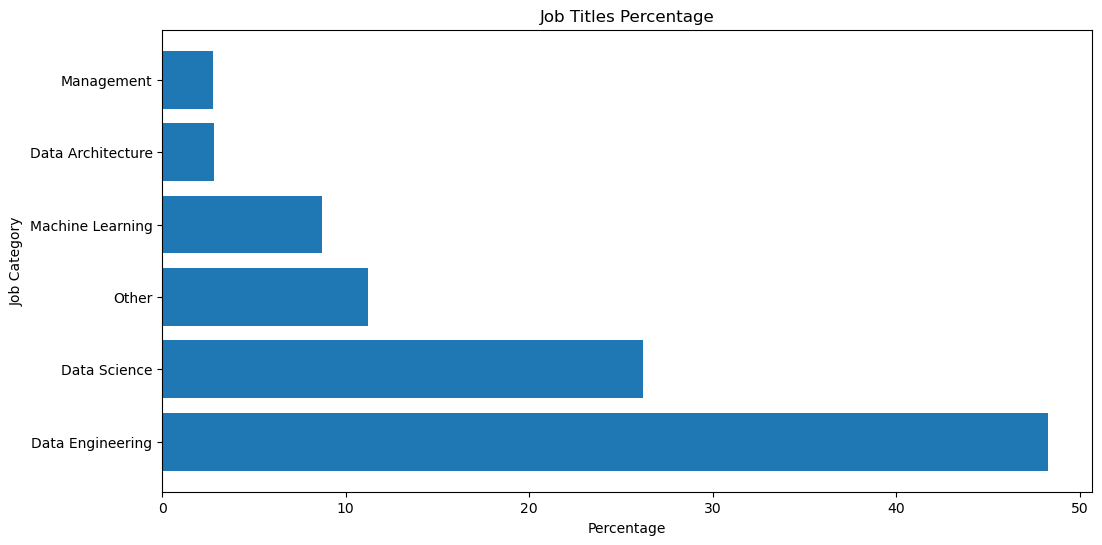

In [22]:
value_counts = mySalariesDF['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

### Distribution across different employment types

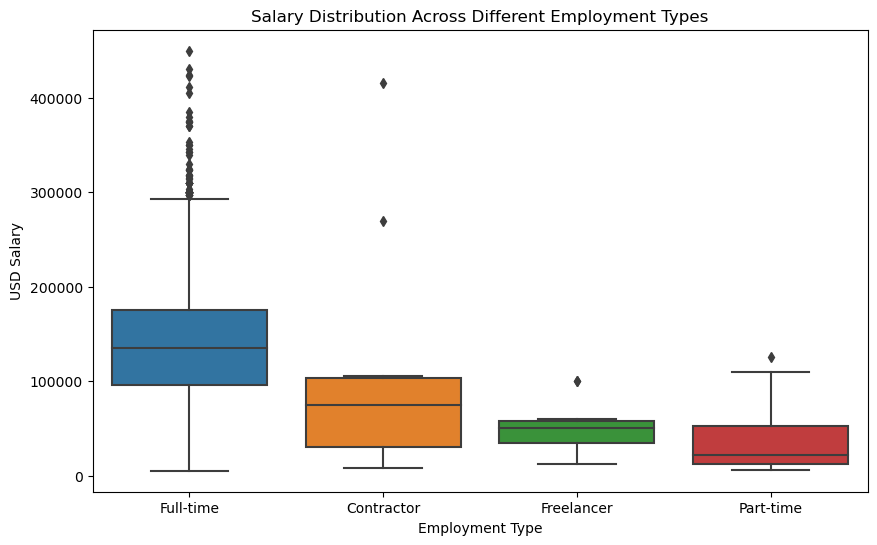

In [23]:
# Salary distribution across different employment types
plt.figure(figsize=(10, 6))
sns.boxplot(data=mySalariesDF, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('USD Salary')
plt.show()


In [24]:
mySalariesDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,LARGE,Other
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL,Machine Learning
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,MEDIUM,Data Science
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,MEDIUM,Data Science
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,LARGE,Data Science
3751,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,LARGE,Other
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,SMALL,Data Science
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,LARGE,Data Engineering


### Create and analyze box plots for each Categorical feature grouped by salary_in_usd

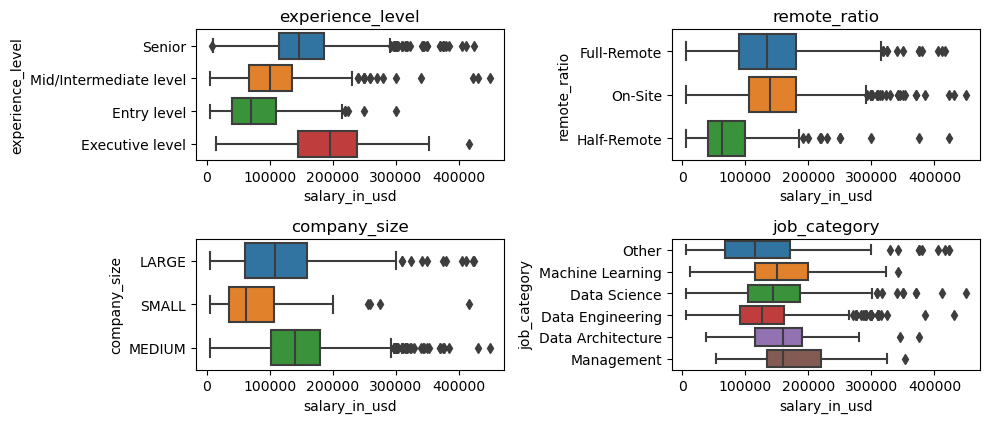

In [30]:
##### Specify the columns
feautures_columns = ['experience_level', 'remote_ratio', 'company_size', 'job_category']

# Set the figure size
plt.figure(figsize=(10, 6))


for feature in feautures_columns:
    plt.subplot(3, 2, feautures_columns.index(feature) + 1)
    sns.boxplot(x='salary_in_usd', y=feature, data=mySalariesDF)
    plt.title(feature)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

### Distribution of Salary